<h1>Task 3 - Data Science and Business Analytics</h1>
<h2>Author: Riju Ray</h2>
<h3>GRIP Internship - The Sparks Foundation</h3>

## **Exploratory Data Analysis - Retail**
In this task, I will perform ‘Exploratory Data Analysis’ on the dataset ‘SampleSuperstore’. As a business manager, I will try to find out the weak areas where we can work to make more profit. Also, what all business problems can be derived by exploring the data and where we should work to make more profit.

### Importing the libraries

In [76]:
!pip install plotnine 

     |████████████████████████████████| 4.7 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 3.6 MB/s eta 0:00:01


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install plotly

In [4]:
#Loading the dataset
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

### Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [142]:
df.isnull().sum() #checking for missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
state_code      0
dtype: int64

In [9]:
df.duplicated().sum()

17

In [10]:
df.drop_duplicates() #dropping the duplicates

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Data Cleaning

In [12]:
#dropping irrelevant data
df.drop(columns='Postal Code', inplace= True) 
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<AxesSubplot:>

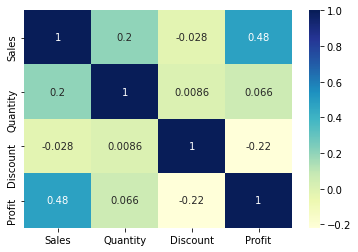

In [13]:
#checking the correlation
corr=df.corr()
sns.heatmap(corr, annot= True, cmap='YlGnBu')

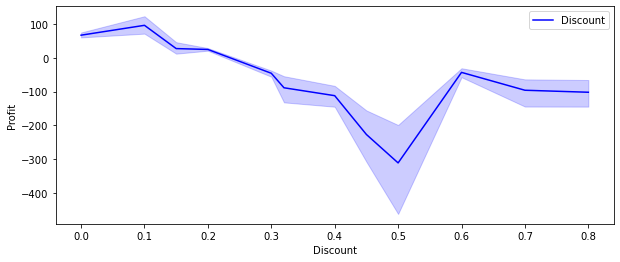

In [45]:

plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=df[['Profit','Discount']] , color='b',label='Discount')
plt.legend()
plt.show()

### Observation:

From the above correlation plot, we can see that **Discount** and **Profit** are not at all related

In [14]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


<Figure size 1080x1080 with 0 Axes>

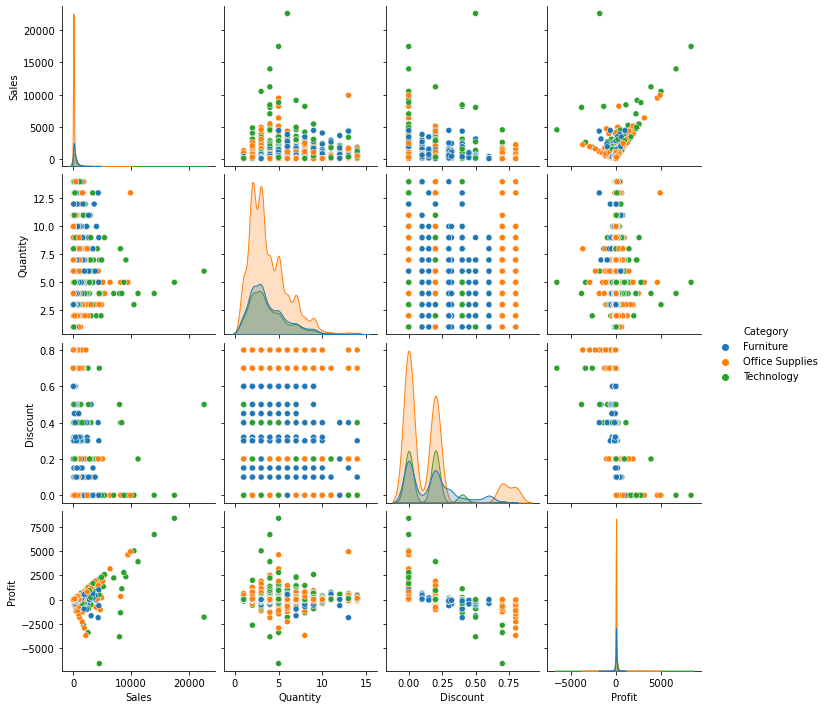

In [15]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df, hue='Category')

From the above plot we can say that our data is not normal and it has some amount of outliers too. Let's explore more about these outliers by using boxplots. 1st we'll check sales from every segments of whole data.

<AxesSubplot:xlabel='Category', ylabel='count'>

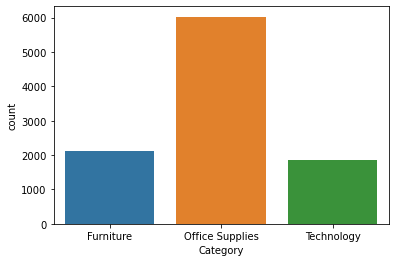

In [138]:
# Which Category has the most no of orders?
sns.countplot(x='Category',data=df)

### Observation:
Office Supplies has most demand.

In [20]:
salesinstate=df['State'].value_counts().to_frame()
salesinstate.head()

,State
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506


Text(0.5, 1.0, 'State Orders')

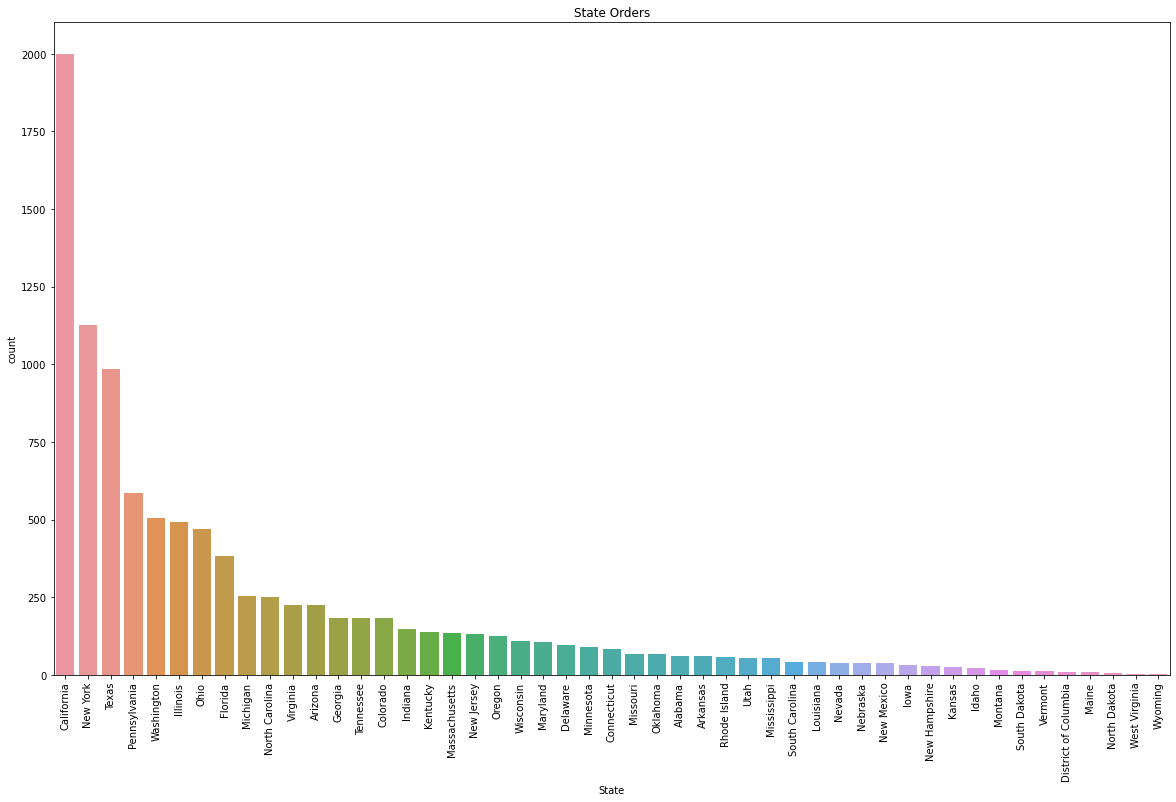

In [134]:
# Orders with respect to States.
plt.figure(figsize=(20,12))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("State Orders")


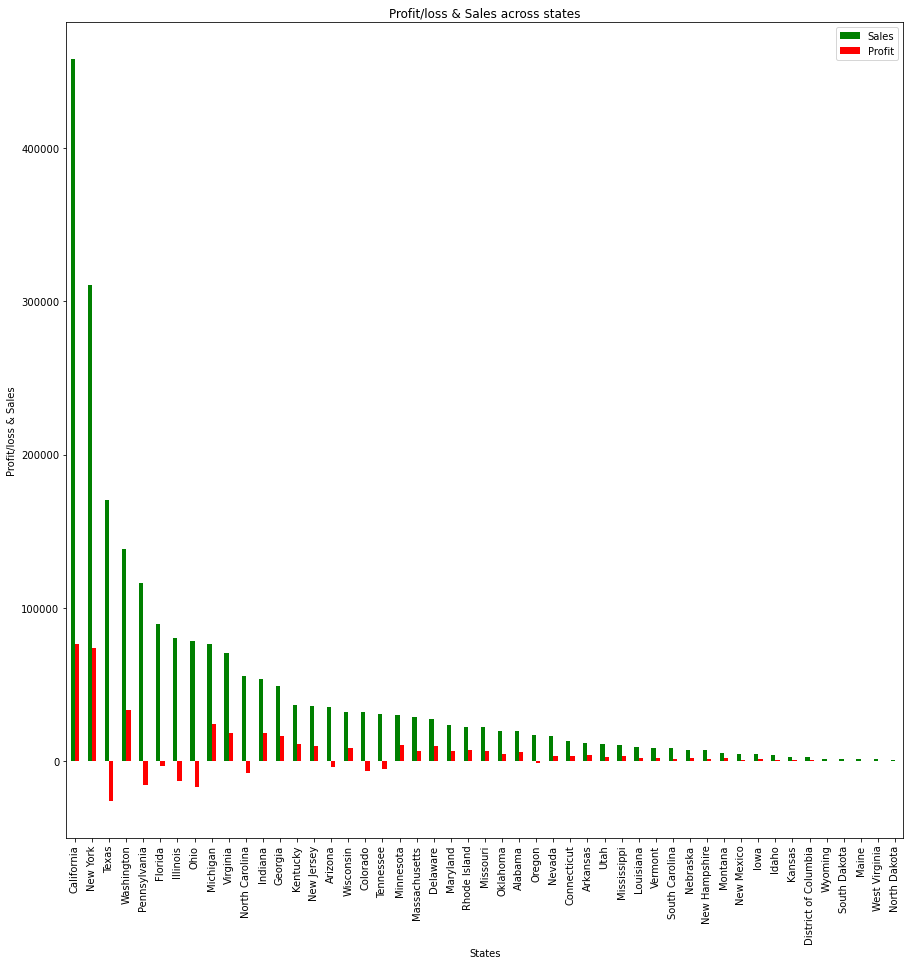

In [130]:
#State vs Grouped(Pales and Profit), also we are sorting Sales in descending order
proloss = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
proloss[:].plot.bar(color=['green','red'],figsize=(15,15))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Observation:
Texas, Pennsylvania, Florida, Illinois, Ohio, North Carolina, Arizona, Colorado and Tennessee are suffering losses

Text(0.5, 0, 'profit')

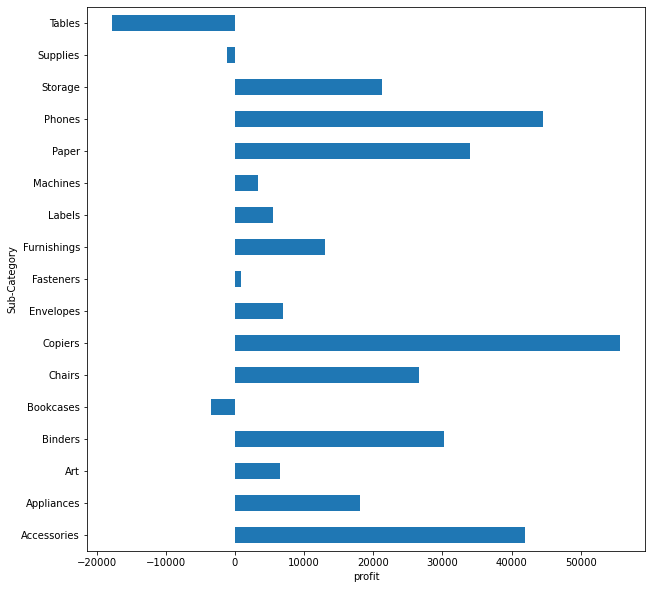

In [18]:
# Which Sub-Category of products contibutes most to profits/losses?
scategoryprice=df.groupby(['Sub-Category'])['Profit'].sum()
plt.figure(figsize=(10,10))
scategoryprice.plot.barh()
plt.xlabel('profit')

### Observation:
The above graph clearly shows that *Copiers* and *Phones* have highest profit and **tables** suffer highest loss, followed by **bookcases**.

In [22]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

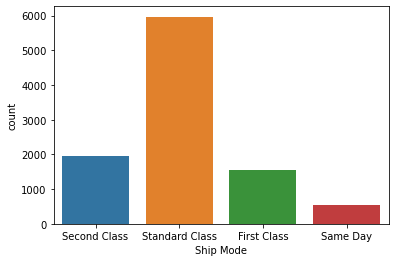

In [23]:
#Categorising Orders on the basis of Shipment Mode.
sns.countplot(x=df['Ship Mode'])

### Observation
Standard Class is preferred most by customers.

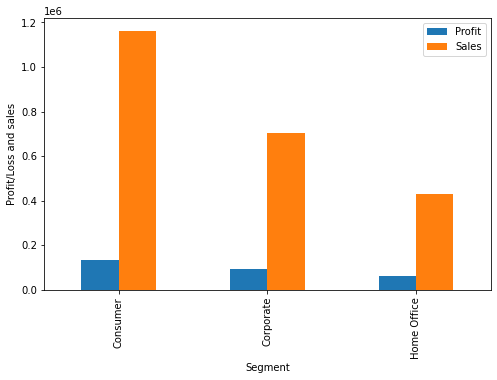

In [27]:
#We group Segment with profit and sales and plot a bar graph
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

In [28]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

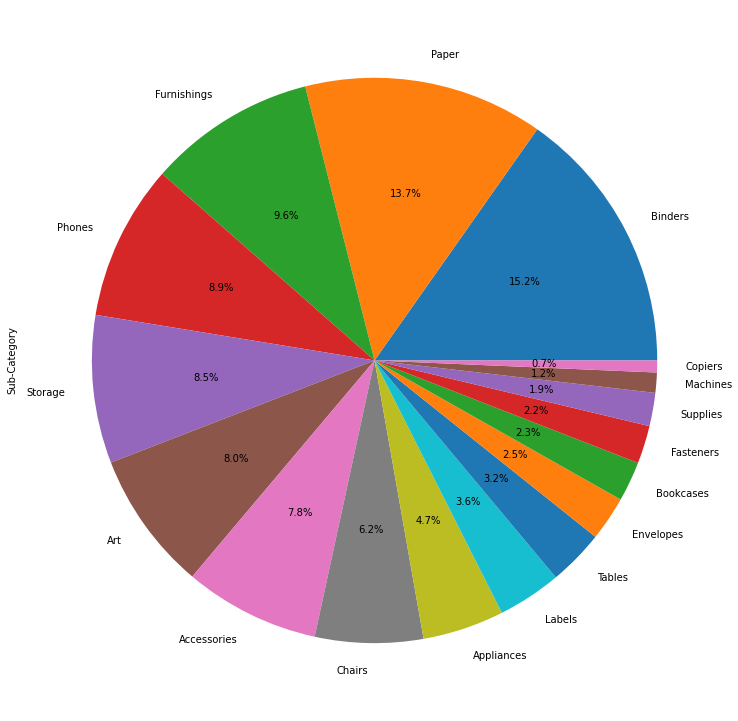

In [139]:
#Percentage of Orders per Sub - Category
plt.figure(figsize=(13,13))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Observation:
Maximum produced are Binders, Paper, Furnishings, Phones, Storage, Art, Accessories and Minimum produced are Copiers, Machines, Suppliers

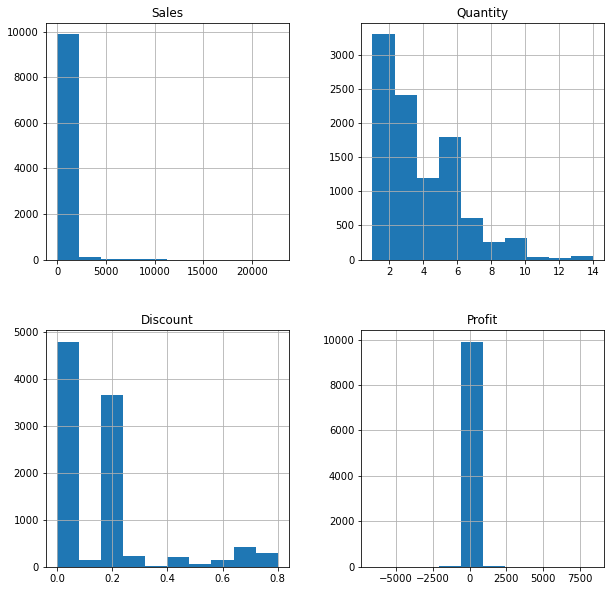

In [36]:
#Plotting Histogram of all the numerical features
df.hist(figsize=(10,10))
plt.show()

#### Observation:
Most order quantities are of 2 or 3.

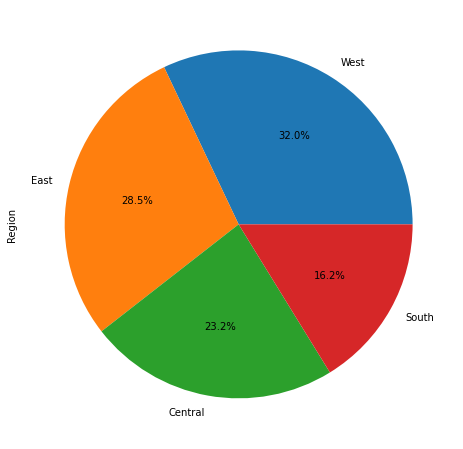

In [140]:
#Percentage of orders by Region
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

#### Observation:
East Region gets most no of orders.

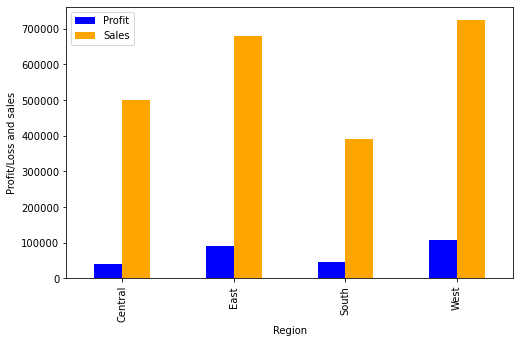

In [136]:
#Profit and Sales Comparison for different regions
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','orange'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation:
Central Region is not producing much profits compared to the its sales.

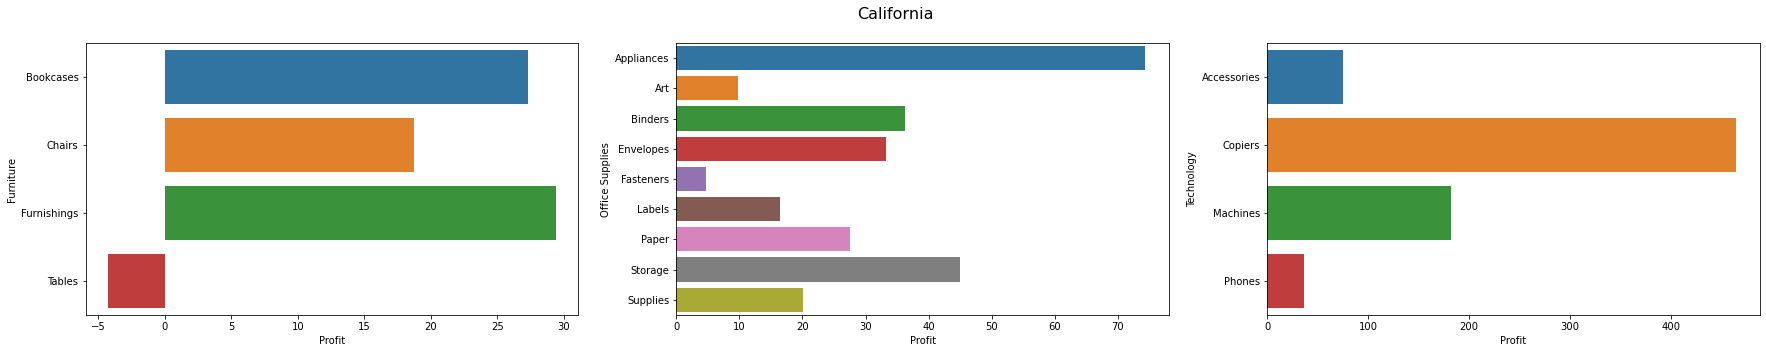

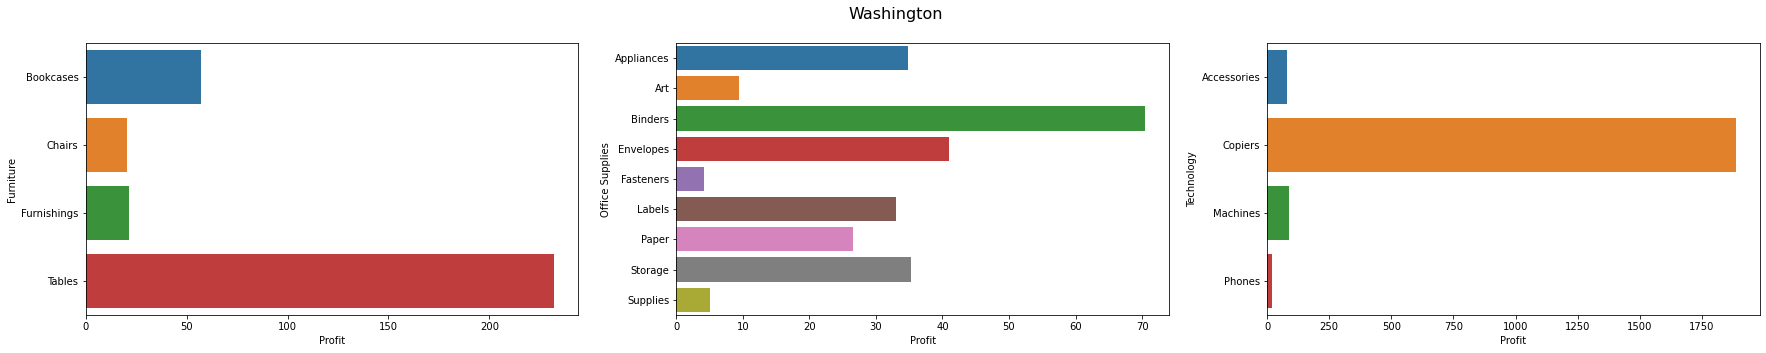

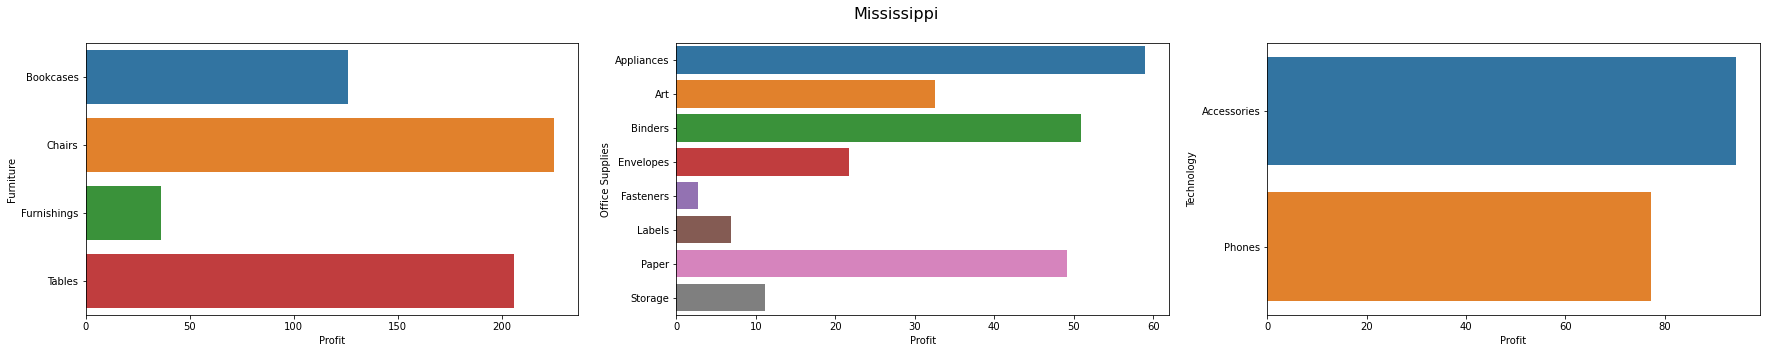

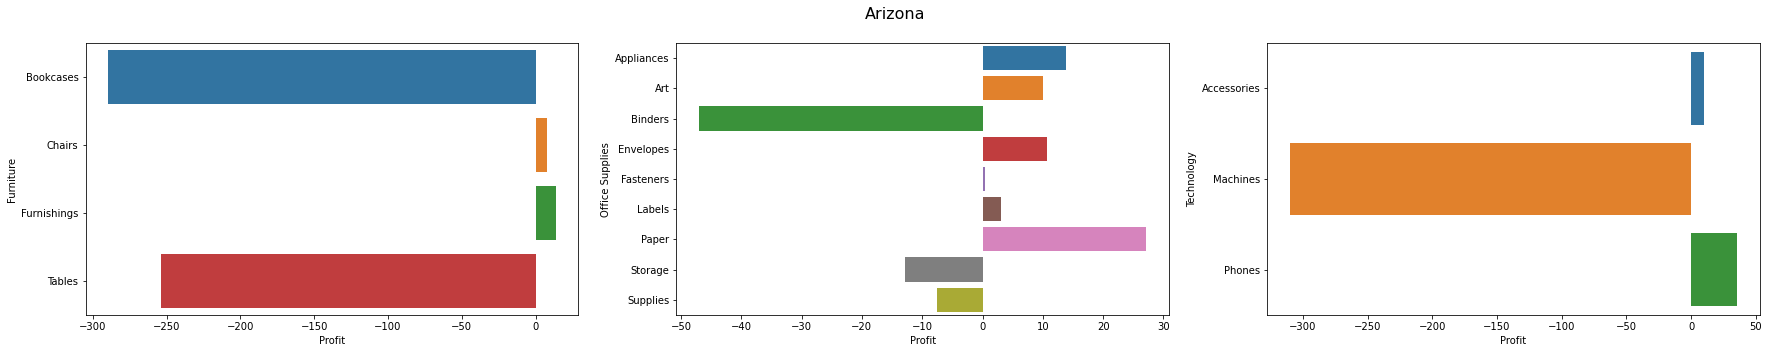

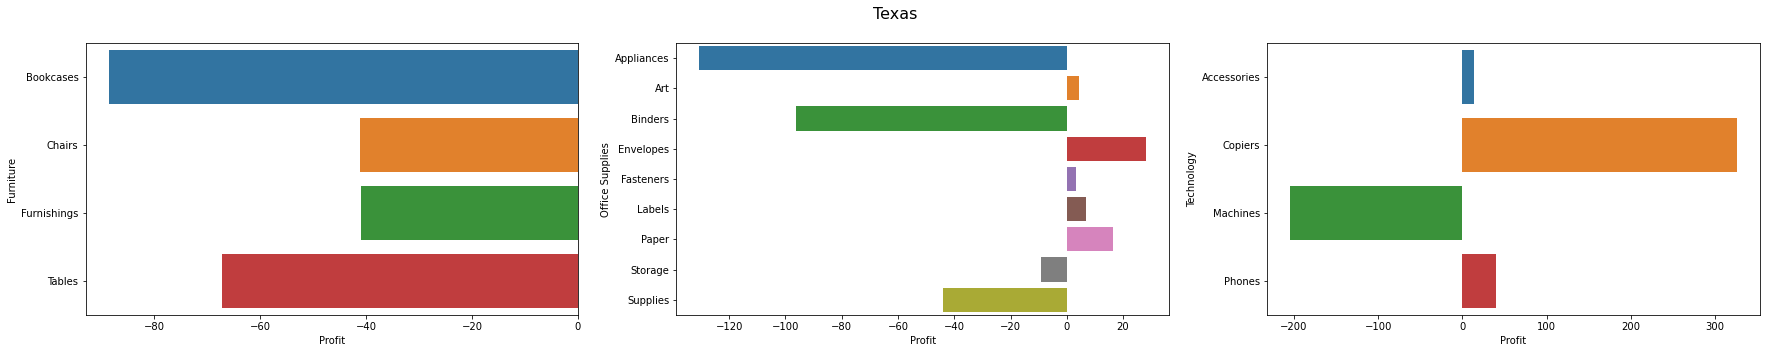

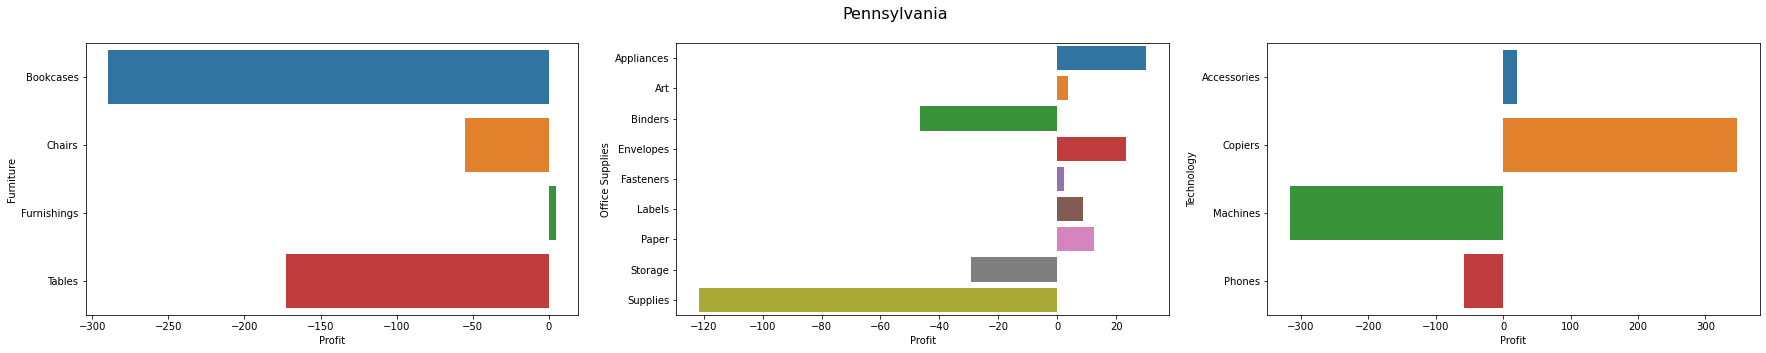

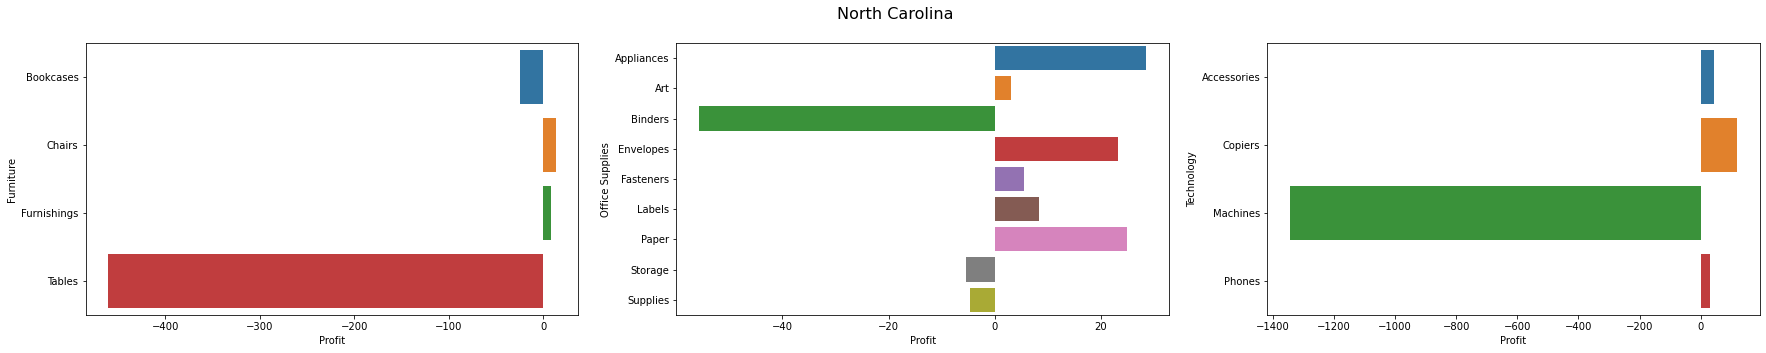

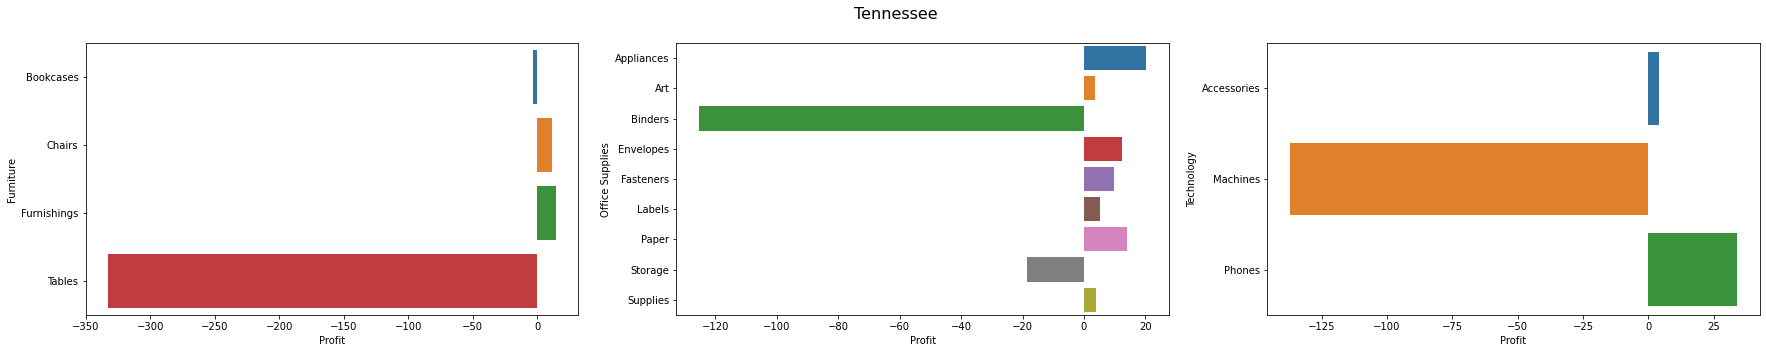

In [141]:
# profit of product categories and sub-categories for the chosen states
def state_data_viewer(states):
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle(state, fontsize = 16)        
        ax_index = 0
        # plot a chart for each category
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot sub-categories in each category
            category_data = data.get_group(category).groupby(['Sub-Category']).mean()
            sns.barplot(x = category_data.Profit, y = category_data.index, 
                        ax = ax[ax_index])
            ax[ax_index].set_ylabel(category)
            ax_index += 1
            # chosen States based on profit/loss categories
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas','Pennsylvania','North Carolina','Tennessee']
state_data_viewer(states)

### Observation:
All the major states facing losses are from their orders of machines.

In [93]:
statescategory=df[['Sub-Category','State']]
ss=statescategory.groupby('State')['Sub-Category'].value_counts().to_frame().index.to_frame()
ss

State Sub-Category
State     Sub-Category                        
Alabama   Binders         Alabama      Binders
          Paper           Alabama        Paper
          Art             Alabama          Art
          Accessories     Alabama  Accessories
          Phones          Alabama       Phones
...                           ...          ...
Wisconsin Labels        Wisconsin       Labels
          Tables        Wisconsin       Tables
          Fasteners     Wisconsin    Fasteners
          Supplies      Wisconsin     Supplies
Wyoming   Chairs          Wyoming       Chairs

[656 rows x 2 columns]

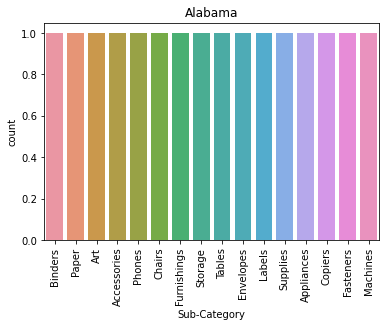

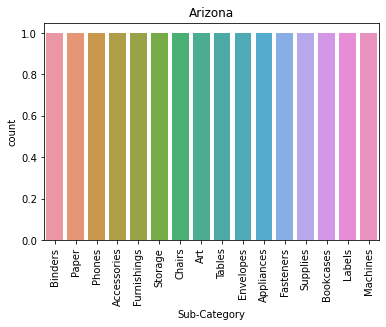

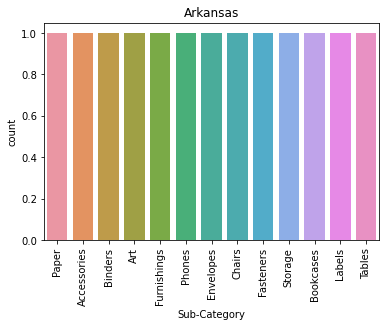

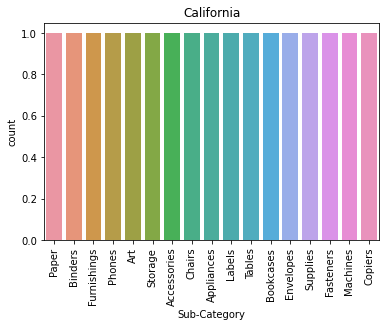

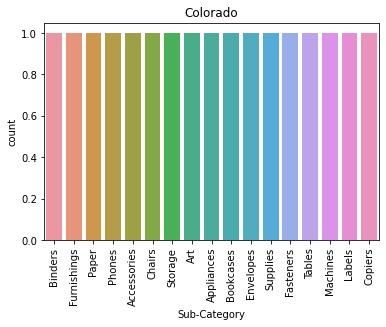

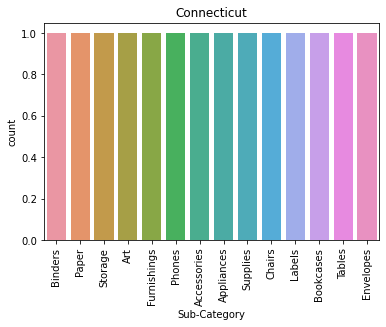

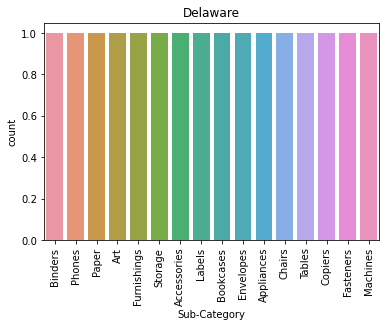

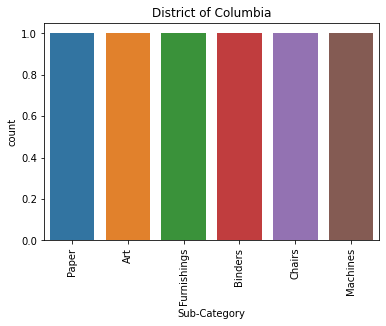

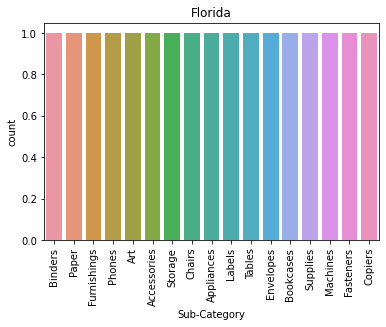

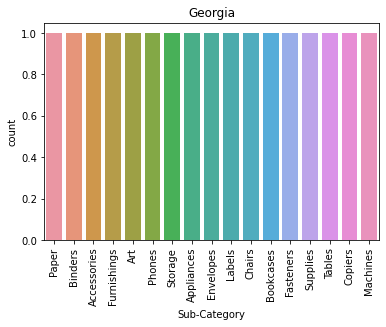

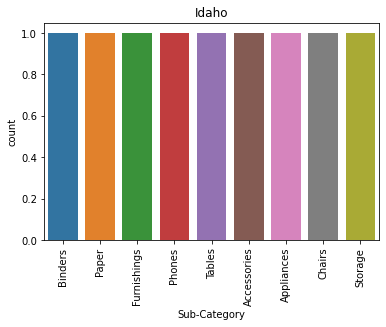

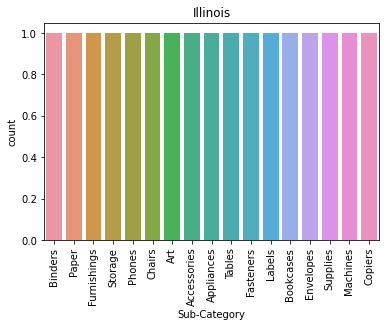

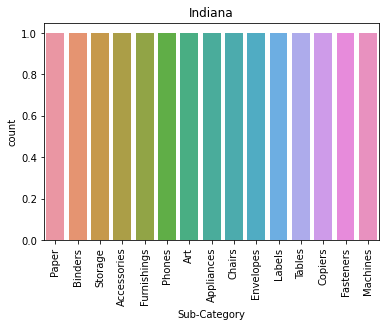

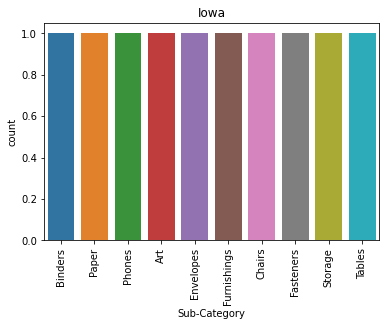

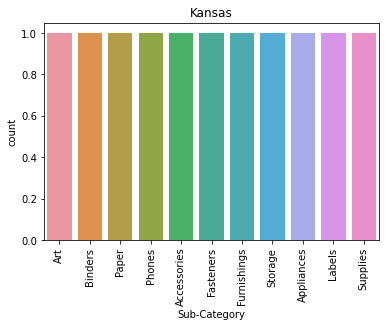

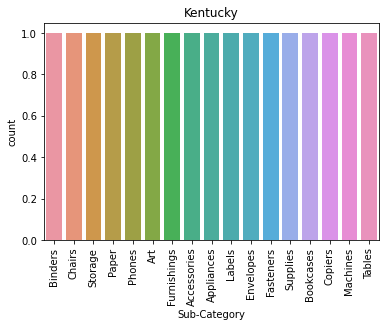

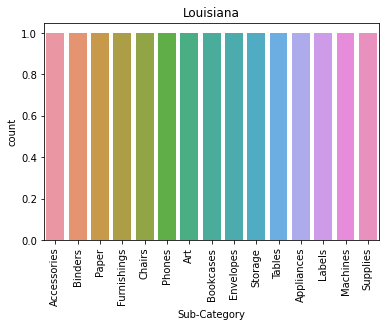

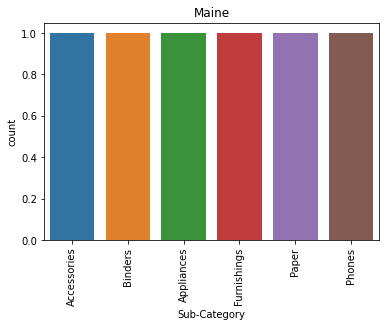

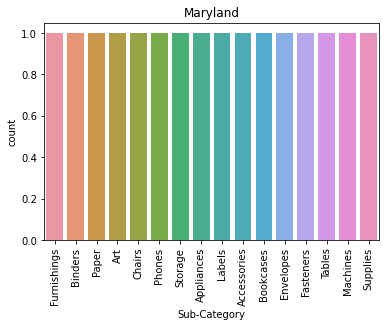

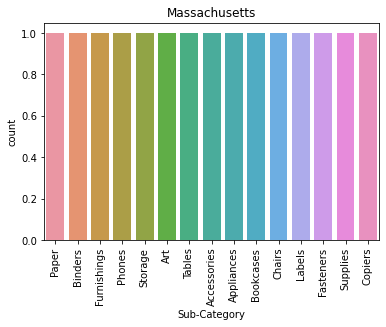

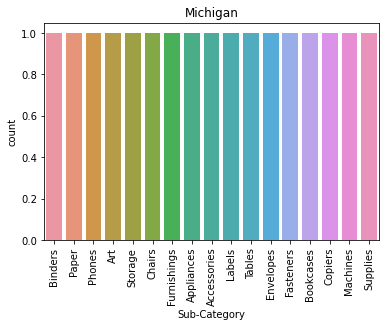

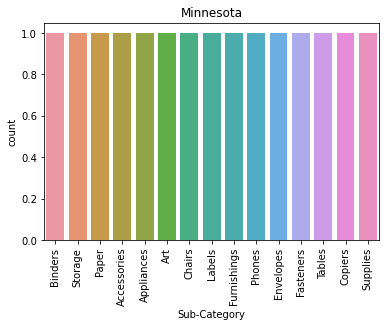

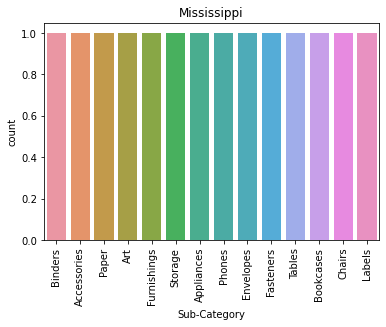

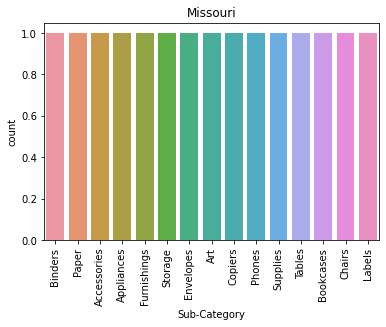

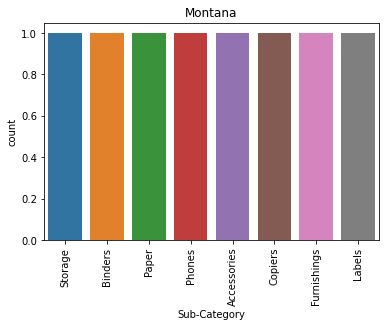

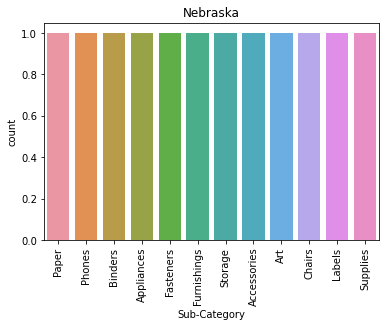

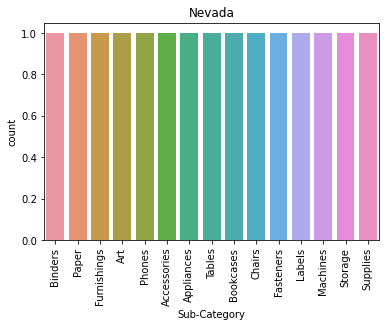

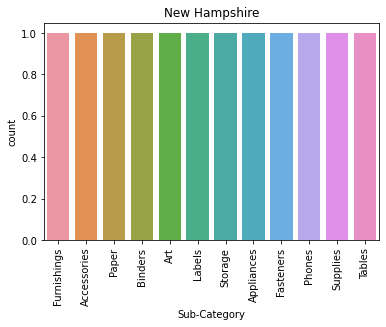

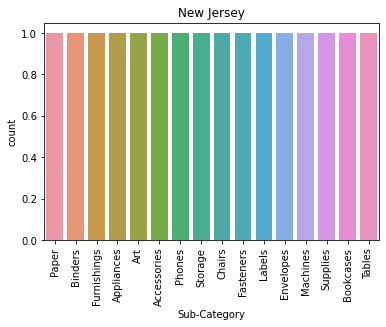

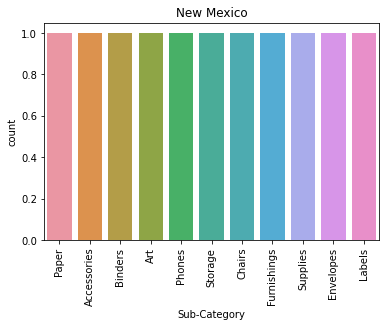

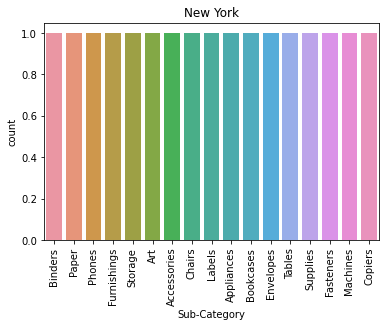

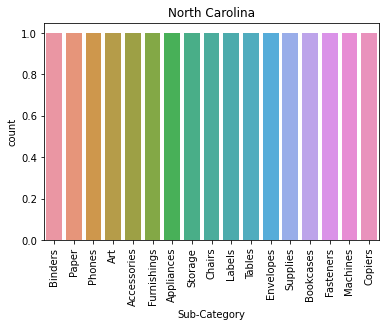

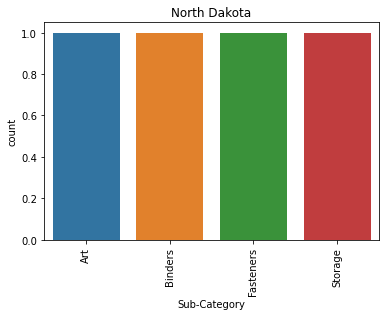

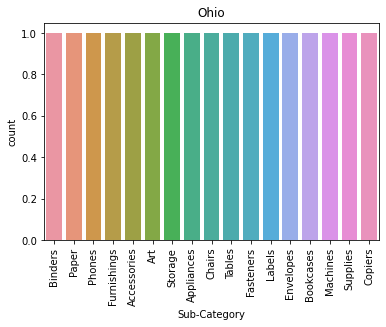

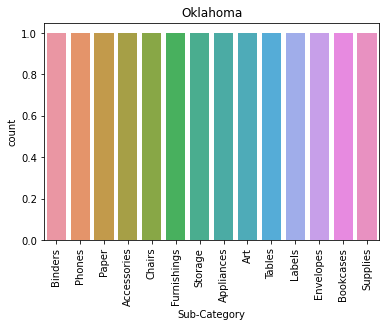

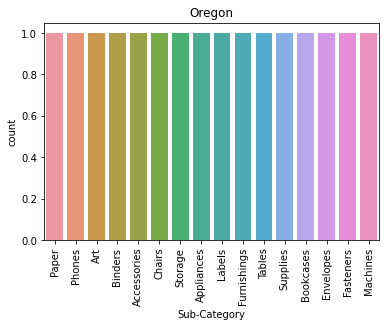

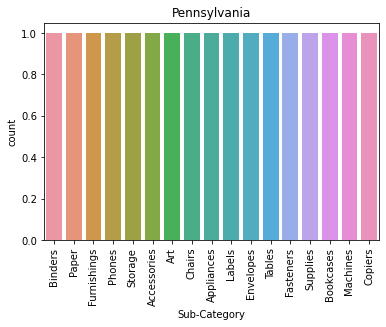

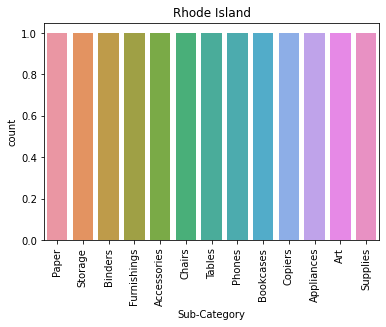

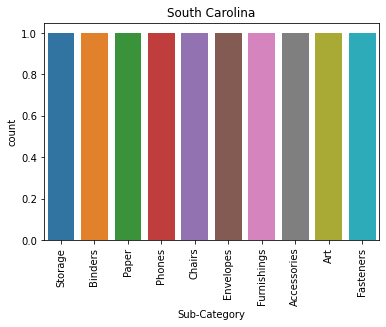

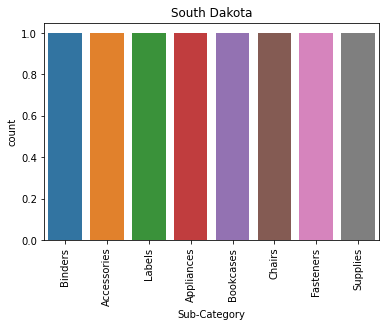

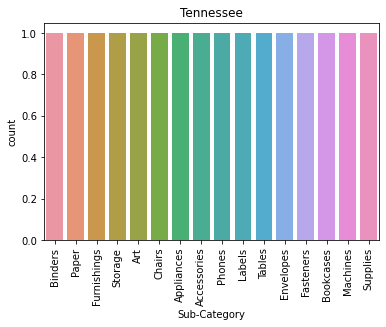

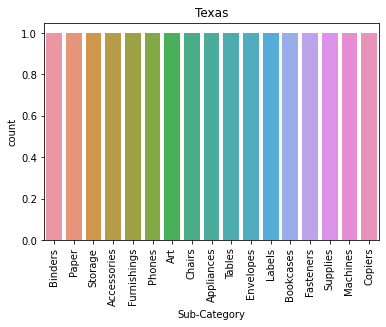

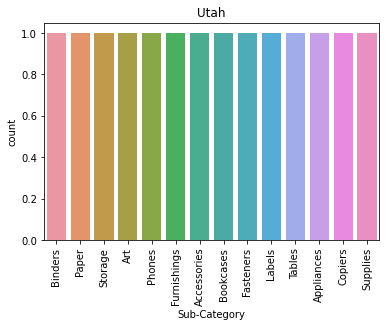

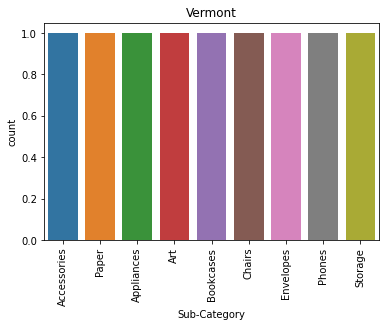

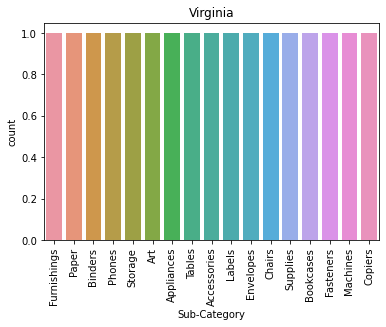

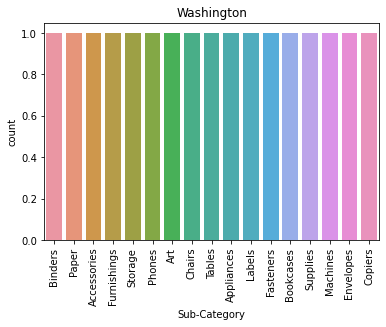

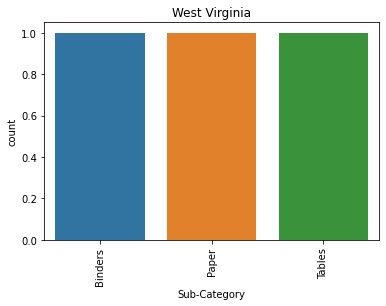

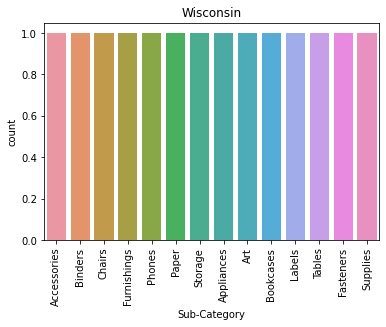

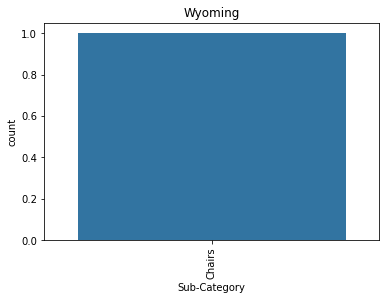

In [117]:
states=ss['State'].unique()
for i in states:
    sns.countplot(x='Sub-Category', data=ss.loc[ss['State']==i])
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()
    

### Observation
Wisconsin, DoC, Idaho, Maine, North Dakota,South Dakota West Virginia, and Wyoming needs more advertising of our products as the we are definitely not the people's choice for many of our products.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [122]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])

In [129]:

state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Blues',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

## Conclusion:

- Copiers should be produced more and advertised more as they bring in a lot of profit but only meets 0.7% of the total orders.
- Wisconsin, DoC, Idaho, Maine, North Dakota, South Dakota, West Virginia, and Wyoming needs more advertising of our products as the we are definitely not the people's choice for many of our products.
-Texas, Pennsylvania, Florida, Illinois, Ohio, North Carolina, Arizona, Colorado and Tennessee are suffering losses and the main contributor being machines.
- Tables and bookcases are contributing most in the losses of the company although its getting sheltered by the profits brought in by other products in the same region.
